In [1]:
# !pip install -q opencv-python

# !pip install -q opencv-contrib-python

# !pip install -q tensorflow

# !pip install imageio

# !pip install -U scikit-image

In [2]:
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [3]:
import cv2
import imageio.v2 as imageio
import itertools
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import warnings
warnings.filterwarnings('ignore')

E0000 00:00:1738837303.464995   19782 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738837303.511252   19782 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:
images_path = [
    "./images/flower.png", 
    "./images/dog.jpg",
]

In [12]:
images = [cv2.resize(imageio.imread(im), (400, 400)) for im in images_path] # read and resize images

In [13]:
methods = [
    ("area", cv2.INTER_AREA), 
    ("nearest", cv2.INTER_NEAREST), 
    ("linear", cv2.INTER_LINEAR), 
    ("cubic", cv2.INTER_CUBIC), 
    ("lanczos4", cv2.INTER_LANCZOS4)
           ]

In [14]:
images_resized = [cv2.resize(im, (50,50),interpolation=cv2.INTER_AREA) for im in images]

In [15]:
image_set = [[cv2.resize(im, (400,400), interpolation = m[1]) for m in methods] for im in images_resized] # resize images

In [16]:
image_set = [[cv2.resize(im, (400,400), interpolation =m[1]) for m in methods] for im in images_resized] # other methods

In [19]:
image_set = [[ima,] + imb for ima, imb in zip(images_resized, image_set)]

names = ["original 50x50",] + [m[0] + " 400x400" for m in methods]

In [20]:
def display_images(images, titles=None):
    if titles is None:
        titles = ['']
    
    if isinstance(images[0], list):
        c = len(images[0])
        r = len(images)
        images = list(itertools.chain(*images))
    else:
        c = len(images)
        r = 1
    
    plt.figure(figsize=(4 * c, 4 * r))
    gs1 = gridspec.GridSpec(r, c, wspace=0, hspace=0)
    titles = itertools.cycle(titles)
    
    for i in range(r * c):
        im = images[i]
        title = next(titles)
        
        plt.subplot(gs1[i])
        plt.imshow(im, cmap='gray', interpolation='none')
        plt.axis('off')
        
        if i < c:
            plt.title(title)
    
    plt.tight_layout()


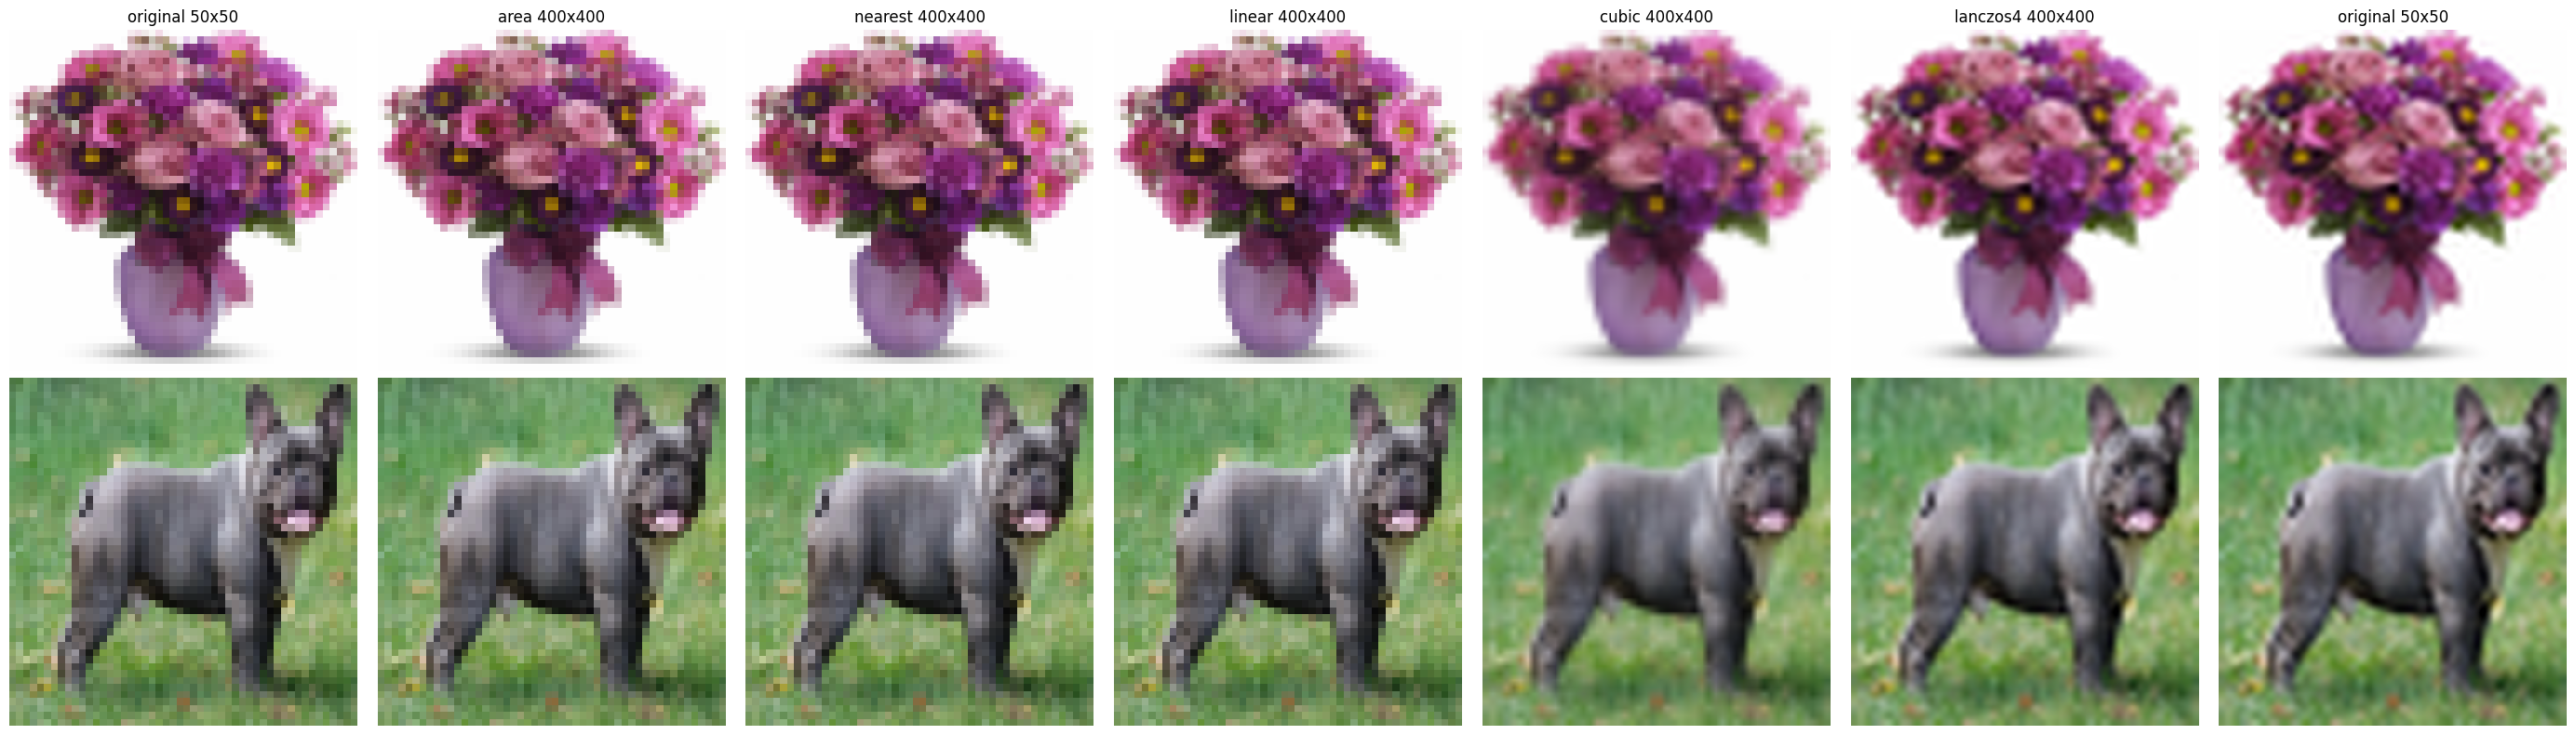

In [21]:
display_images(image_set, names)
plt.savefig("images/opencv_interpolation.jpg", dpi=75)